In [19]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns

import wrangle as wr

In [2]:
# splitting data
train, validate, test = wr.wrangle_zillow()

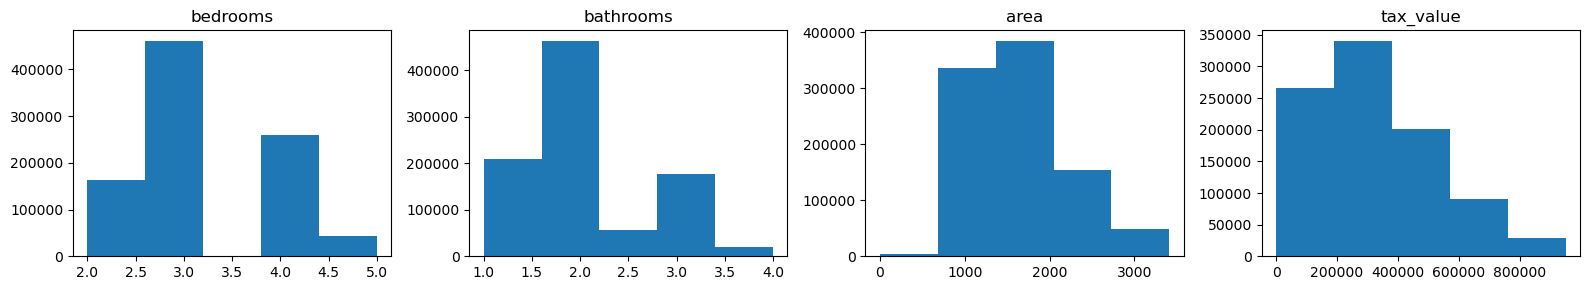

In [3]:
wr.get_hist(train)

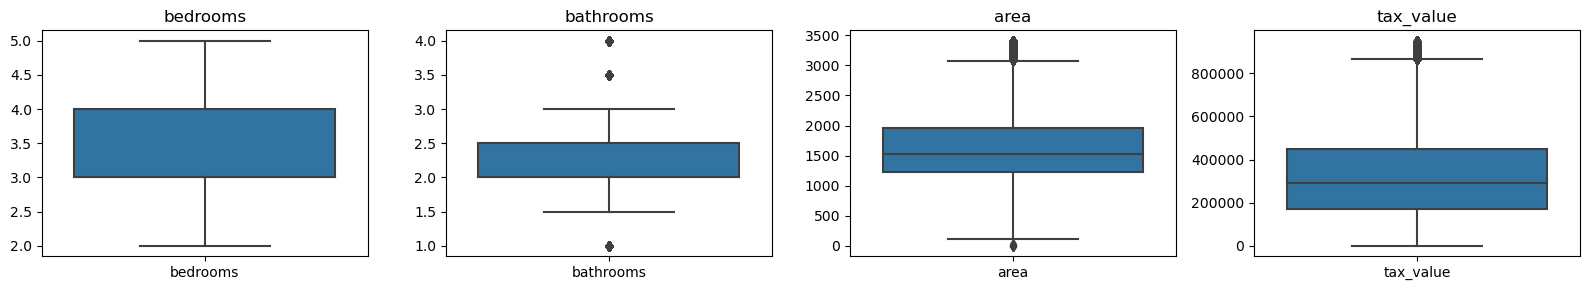

In [4]:
wr.get_box(train)

## Scaling

In [9]:
# creating and fitting MinMax scaler
scaler = sklearn.preprocessing.MinMaxScaler()
scaler.fit(train[['area', 'tax_value']])

MinMaxScaler()

In [10]:
train_scaled = scaler.transform(train[['area', 'tax_value']])

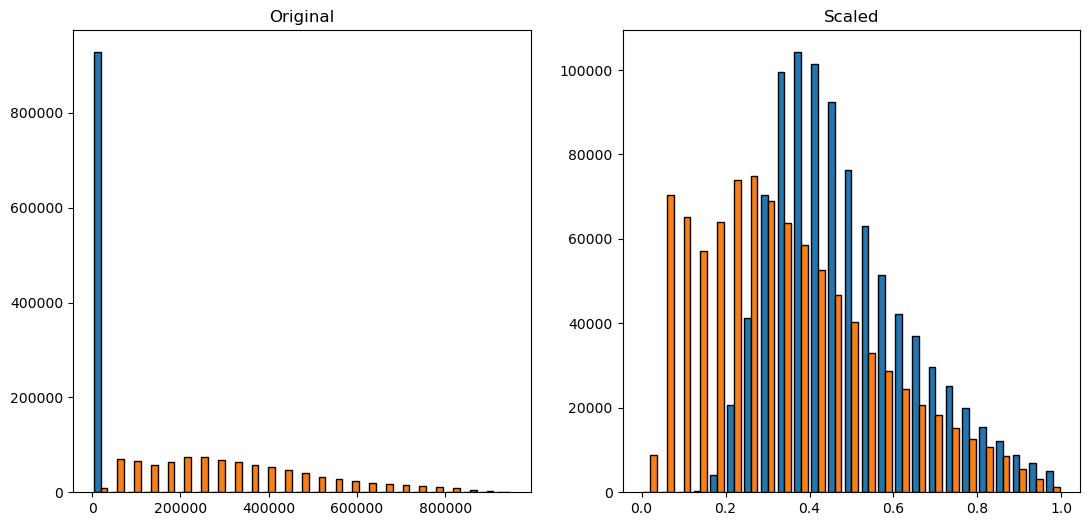

In [11]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train[['area', 'tax_value']], bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled, bins=25, ec='black')
plt.title('Scaled')

plt.show()

In [13]:
train[['area_scaled', 'tax_scaled']] = train_scaled
train.head()

,bedrooms,bathrooms,area,tax_value,year_built,fips,area_scaled,tax_scaled
1462930,3.0,2.0,1385.0,123859.0,1956.0,6059.0,0.405984,0.130229
1842132,4.0,2.0,1567.0,251569.0,1946.0,6037.0,0.459372,0.264531
869730,4.0,2.0,1910.0,762153.0,1958.0,6059.0,0.559988,0.801469
1306111,3.0,2.0,2042.0,751716.0,1936.0,6037.0,0.598709,0.790493
431629,3.0,2.0,1502.0,351732.0,1956.0,6037.0,0.440305,0.369864


In [15]:
# transforming on test and validate
test[['area_scaled', 'tax_scaled']] = scaler.transform(test[['area', 'tax_value']])
validate[['area_scaled', 'tax_scaled']] = scaler.transform(validate[['area', 'tax_value']])

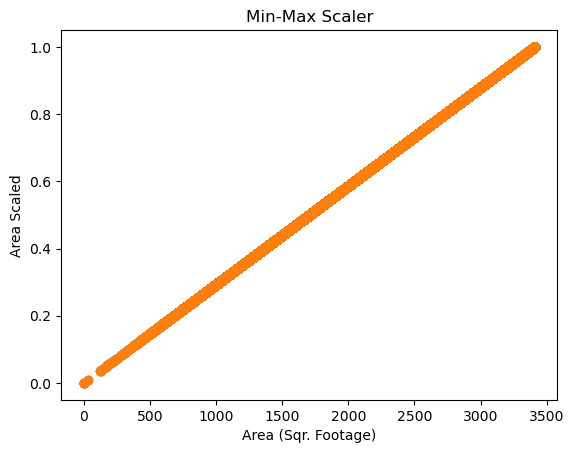

In [17]:
# Visualize the scaling total_bill:

plt.scatter(train.area, train.area_scaled)
plt.xlabel('Area (Sqr. Footage)')
plt.ylabel('Area Scaled')
plt.title('Min-Max Scaler')
plt.show();

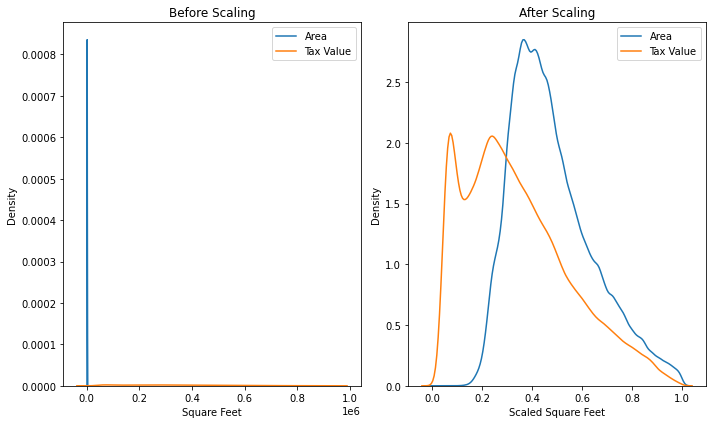

In [24]:
plt.figure(figsize = (10,6))

plt.subplot(121)
sns.kdeplot(x = train.area, label = 'Area')
sns.kdeplot(x = train.tax_value,label = 'Tax Value')
plt.xlabel('Square Feet')
plt.legend()
plt.title('Before Scaling')

plt.subplot(122)
sns.kdeplot(x = train.area_scaled, label = 'Area')
sns.kdeplot(x = train.tax_scaled,label = 'Tax Value')
plt.xlabel('Scaled Square Feet')
plt.title('After Scaling')
plt.legend()

plt.tight_layout()
plt.show()